### 问题描述
---
1. 简述仿射变换和透视变换的基本概念，并用实例说明。
2. 结合图简述图像坐标系、相机坐标系和世界坐标系的定义，并说明三者之间的变换关系。
3. 什么是相机的内、外参数矩阵？实际中你能结合身边的实例(如电脑摄像头、手机镜头)说明这些参数的大致值么？
4. 说明使用线性法求解相对位姿时的要求输入和输出，以及求解的基本思想。
5. 说明使用Zhang方法进行相机标定需要的输入条件和得到的具体输出量，以及Zhang方法的主要步骤

# 简述仿射变换和透视变换的基本概念，并用实例说明。

## 仿射变换的基本概念

仿射变换描述的是二维坐标下的变换操作，主要包括：平移（Translation）、旋转（Rotation）、缩放（Scale）、翻转（Flip）、错切（Shear）几种，每种操作均可以表示为矩阵的形式。尤其注意的是，图像经过仿射变换后，原来的直线和平行线，仿射变换之后仍然为直线和平行线。

1. 平移变换：其中$x_0$和$y_0$分别为x和y的坐标平移量
$$
\left[ \begin{matrix} x' \\ y' \end{matrix} \right] = 
\left[ \begin{matrix} 1&0&x_0 \\ 0&1&y_0 \end{matrix} \right]
\left[ \begin{matrix} x \\ y \\ 1 \end{matrix} \right]
$$

2. 旋转变换：绕原点逆时针旋转角度𝜃
$$ 
\left[ \begin{matrix} x' \\ y' \end{matrix} \right] =  
\left[ \begin{matrix} cos(\theta)&-sin(\theta) \\ sin(\theta)&cos(\theta) \end{matrix} \right]
\left[ \begin{matrix} x \\ y \end{matrix} \right]
$$

3. 缩放变换：其中，$s_x$和$s_y$分别为x和y坐标的缩放因子，其大于1表示放大，小于1表示缩小
$$
\left[ \begin{matrix} x' \\ y' \end{matrix} \right] = 
\left[ \begin{matrix} s_x&0 \\ 0&s_y \end{matrix} \right]
\left[ \begin{matrix} x \\ y \end{matrix} \right]
$$

4. 翻转变换（以x轴翻转变换为例）
$$
\left[ \begin{matrix} x' \\ y' \end{matrix} \right] =
\left[ \begin{matrix} -1&0 \\ 0&1 \end{matrix} \right]
\left[ \begin{matrix} x \\ y \end{matrix} \right]
$$

5. 错切（以x轴错切为例）
$$
\left[ \begin{matrix} x' \\ y' \end{matrix} \right] =
\left[ \begin{matrix} 1&-tan(\theta) \\ 0&1 \end{matrix} \right]
\left[ \begin{matrix} x \\ y \end{matrix} \right]
$$

综上所述，仿射变换的基本形式可以综合表述为：
$$ 
\left[ \begin{matrix} x' \\ y' \end{matrix} \right] =
\left[ \begin{matrix} m_{11}&m_{12}&b_1 \\ m_{21}&m_{22}&b_2 \end{matrix} \right]
\left[ \begin{matrix} x \\ y \\ 1 \end{matrix} \right]
或
\left[ \begin{matrix} x' \\ y' \end{matrix} \right] =
\left[ \begin{matrix} m_{11}&m_{12} \\ m_{21}&m_{22} \end{matrix} \right]
\left[ \begin{matrix} x \\y \end{matrix} \right]+
\left[ \begin{matrix} b_1 \\ b_2 \end{matrix} \right]
$$

### 仿射变换具有如下性质：
   1. 仿射变换有6个自由度（对应变换中的6个系数），因此，仿射变换后互相平行直线仍然为平行直线，三角形映射后仍然是三角形，但却不能保证将四边形以上的多边形映射为等边数的多边形。
   2. 仿射变换的乘积和逆变换仍是仿射变换。
   3. 仿射变换能够实现平移、旋转、缩放等几何变换。

## 仿射变换实例展示如下

(512, 512, 3)

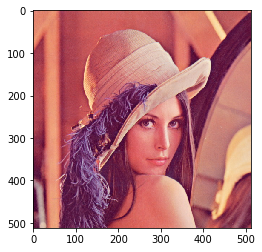

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'E:\QQ Files\OpenCV-img\data\lena.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

In [14]:
new_img = img.copy()

[[  1.2  -1.   70. ]
 [  0.2   1.  -80. ]]


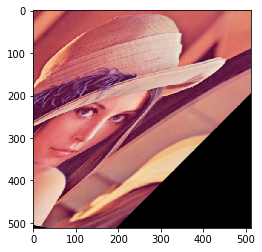

In [15]:
orig_point = np.float32([(150,200),(400,150),(400,400)])  # 平面内随便找三个点的坐标
trans_point = np.float32([(50,150),(400,150),(150,400)])  # 对这三个点分别进行相应坐标变换

# cv.getAffineTransform(srcTri,dstTri)其中srcTri,dstTri分别是由三个顶点定义的平行四边形（由于是平行四边形，只需要三个顶点就可以确定）
# 即：给出变换前的ABCD和变换后的A'、B'、C'、D'，前后
M = cv.getAffineTransform(orig_point, trans_point) # 根据原始点
dst = cv.warpAffine(new_img,M,(512,512))  # 将图片new_img中每个像素点都按照矩阵M运算
plt.imshow(dst)
print(M)

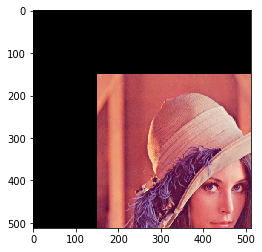

In [16]:
# 平移变换
M = np.array([[1.,0.,150.],[0.,1.,150.]])
dst = cv.warpAffine(new_img,M,(512,512))  # 将图片new_img中每个像素点都按照矩阵M运算
plt.imshow(dst)

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]


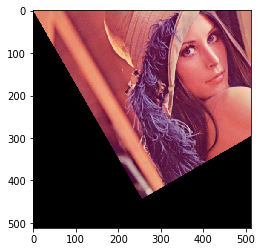

In [17]:
# 旋转变换
M = np.array([[np.cos(np.pi/6),np.sin(np.pi/6),0.],[-np.sin(np.pi/6),np.cos(np.pi/6),0.]])
#cv.c
dst = cv.warpAffine(new_img,M,(512,512))  # 将图片new_img中每个像素点都按照矩阵M运算
plt.imshow(dst)
print(M)

[[0.5 0.  0. ]
 [0.  1.5 0. ]]


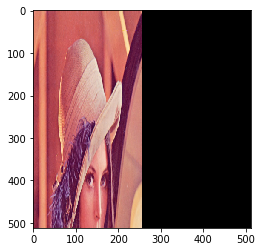

In [18]:
# 缩放变换
M = np.array([[0.5,0.,0],[0.,1.5,0]])
dst = cv.warpAffine(new_img,M,(512,512))  # 将图片new_img中每个像素点都按照矩阵M运算
plt.imshow(dst)
print(M)

[[ -1.   0. 512.]
 [  0.   1.   0.]]


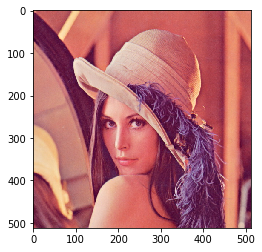

In [19]:
# 翻转变换
M = np.array([[-1.,0.,512],[0.,1.,0]])  # 512是为了将翻转后的图像从x轴-512到0，平移到0到512，方便显示
dst = cv.warpAffine(new_img,M,(512,512))  # 将图片new_img中每个像素点都按照矩阵M运算
plt.imshow(dst)
print(M)

[[1.  0.4 0. ]
 [0.  1.  0. ]]


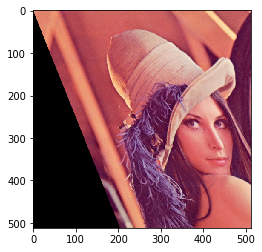

In [20]:
# 错切变换
M = np.array([[1.,0.4,0],[0.,1.,0]])
dst = cv.warpAffine(new_img,M,(512,512))  # 将图片new_img中每个像素点都按照矩阵M运算
plt.imshow(dst)
print(M)

综述，仿射变换的6个自由度，可以通过指定三组映射点（即三个点确定一个平行四边形），再计算出变换关系，最终通过矩阵乘法完成计算 

### 透视变换的基本概念
    把物体的三维图像表示转变为二维表示的过程，称为透视变换，也称为投影映射，其表达式为：
$$ 
\left[ \begin{matrix} u' \\ v'\\ w' \end{matrix} \right] =  
\left[ \begin{matrix} a_{11}&a_{12}&a_{13} \\ a_{21}&a_{22}&a_{23} \\ a_{31}&a_{32}&a_{33} \end{matrix} \right] 
\left[ \begin{matrix} x \\ y \\ 1 \end{matrix} \right]
$$ 
   1. 用途  
   将2D矩阵图像变换成3D的空间显示效果，全景拼接。
   
        
   2. 方法  
   透视变换是将图片投影到一个新的视平面，也称作投影映射。它是二维$(x,y)$到三维$(X,Y,Z)$,再到另一个二维$(x',y')$空间的映射  
   透视变换由9个自由度构成，使用一个$3×3$的矩阵，不仅包含了仿射变换的6个自由度，还可以通过第三行实现了透视变换，具备更大的灵活性，完成将一个四边形区域映射到另一个四边形区域（不一定是平行四边形）的变换过程，即二维 → 三维 → 二维  
   可知，仿射变换是透视变换的一种特殊简化情况，它把二维转到三维，变换后，再转映射回原来的二维空间（仍然保持平行关系）

$ 
\left[ \begin{matrix} X \\ Y \\ Z \end{matrix} \right] =  
\left[ \begin{matrix} a_{11}&a_{12}&a_{13} \\ a_{21}&a_{22}&a_{23} \\ a_{31}&a_{32}&a_{33} \end{matrix} \right]
\left[ \begin{matrix} x \\ y \\ z \end{matrix} \right] = 
\left[ \begin{matrix} T_1&T_2 \\ T_3&a_{33} \end{matrix} \right]
$

其中  
$
T_1 = \left[ \begin{matrix} a_{11}&a_{12} \\ a_{21}&a_{22} \end{matrix} \right] 表示图像的不含平移的仿射变换
$

$
T_2 = \left[ \begin{matrix} a_{13}&a_{23} \end{matrix} \right]^T 表示图像的平移量
$

$
T_3 = \left[ \begin{matrix} a_{31}&a_{32} \end{matrix} \right] 和a_{33}表示图像的透视变换
$

    以上公式设变换之前的点是$z$值为$1$的点，它三维平面上的值为$x,y,1$，在原二维平面上的投影是$x,y$，通过矩阵变换成三维中的点$X,Y,Z$，再通过除以三维中的$Z$轴的值，转换成新二维中的点$x',y'$。  


逐项计算可得  
$
X=a_{11}*x+a_{12}*y+a_{13}
$

$
Y=a_{21}*x+a_{22}*y+a_{23}
$

$
Z=a_{31}*x+a_{32}*y+a_{33}
$


则需要投影的平面新坐标$x',y'$为

$
x'=\frac{X}{Z}=\frac{a_{11}*x+a_{12}*y+a_{13}}{a_{31}*x+a_{32}*y+a_{33}}
$

$
y'=\frac{Y}{Z}=\frac{a_{21}*x+a_{22}*y+a_{23}}{a_{31}*x+a_{32}*y+a_{33}}
$

   3. 具体应用
 
   在OpenCV中，透视变换通过函数cv.wrapPerspective()实现。与仿射变换不同的是，透视矩阵是一个$3×3$的矩阵，在计算矩阵时，可利用函数cv.getPerspectiveTransform()，由于不再是平行四边形，需要提供四边形的四个顶点

[[-8.000e-01  2.000e-01  2.584e+02]
 [-8.000e-01  1.000e-01  2.770e+02]
 [-0.000e+00  0.000e+00  1.000e+00]]


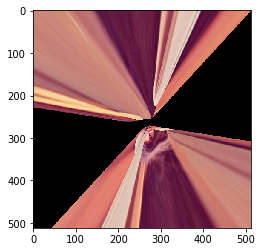

In [24]:
old_point = np.float32([(300,120),(400,120),(300,360),(400,360)])
new_point = np.float32([(250,300),(300,200),(280,280),(450,400)])

M = cv.getPerspectiveTransform(old_point,new_point)
dst = cv.warpPerspective(new_img, M, (512,512))

#plt.imshow(dst[:,:,[2,1,0]])
plt.imshow(dst)
print(np.round(M, 1))

# 结合图简述图像坐标系、相机坐标系和世界坐标系的定义，并说明三者之间的变换关系。

首先通过一张图片，看下几个坐标系在放在一块的样子
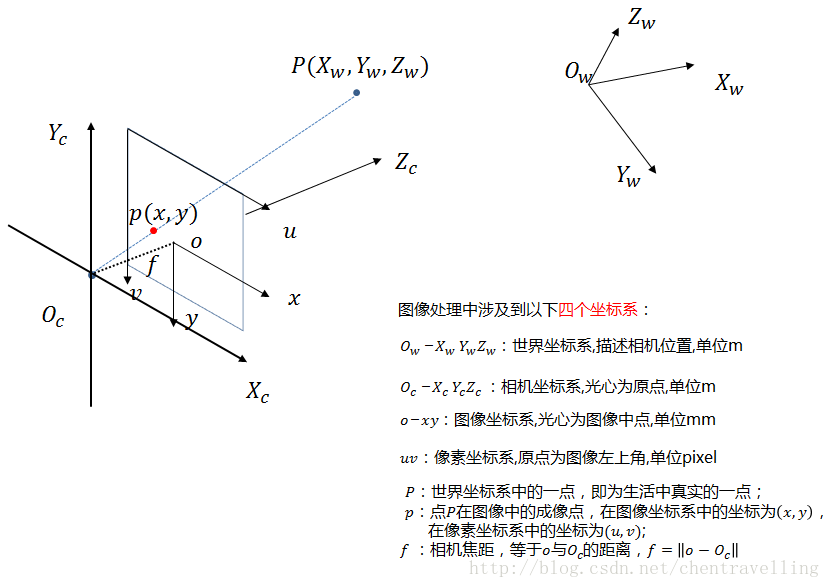

1. 世界坐标系$O_w-X_wY_wZ_w$：以其为基准可以描述相机和待测物体的空间位置
    - 世界坐标系是为了描述相机的位置而被引入的，任何维的旋转可以表示为坐标向量与合适的方阵的乘积。平移向量是第一个坐标原点与第二个坐标原点的偏移量；在世界坐标系下，有两个重要的参数：旋转矩阵$R$和平移向量$T$
    

2. 相机坐标系$O_c-X_cY_cZ_c$：以摄像机光心为原点$O_c$（在针孔模型中也就是针孔为光心），$z$轴与光轴重合也就是z轴指向相机的前方（与成像平面垂直），$x$轴与$y$轴的正方向与物体坐标系平行，其中上图中的$f$为摄像机的焦距


3. 图像坐标系$o-xy$（也叫平面坐标系）：用物理量纲表示像素的位置，坐标原点为摄像机光轴与图像物理坐标系的交点位置（下图的$O_1$）


4. 像素坐标系$uv$：以像素为单位，坐标原点在左上角（下图的$O_0$，在视觉处理库OpenCV中，$u$对应$x$，$v$对应$y$）

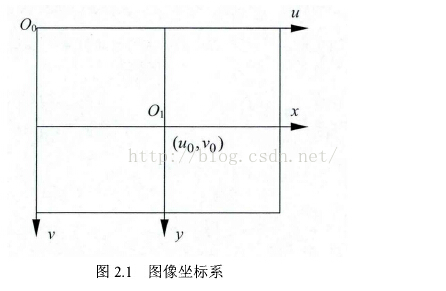

## 图像坐标系和像素坐标系的关系

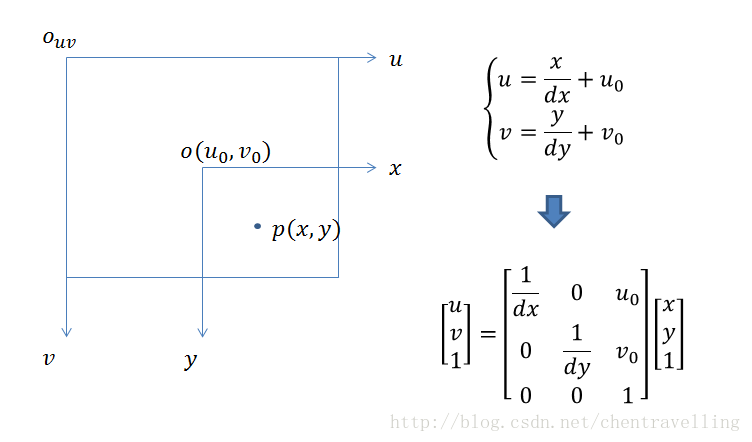


由像素坐标系计算成图像坐标系的矩阵计算关系如下
   
$
\left[ \begin{matrix} u \\ v \\ 1 \end{matrix} \right] =
\left[ \begin{matrix} \frac{1}{dx}&0&u_0 \\ 0&\frac{1}{dy}&v_0 \\ 0&0&1 \end{matrix} \right]
\left[ \begin{matrix} x \\ y \\ 1 \end{matrix} \right]
$ 

展开后，像素的宽高为  
$
u=\frac{x}{dx}+u_0 \\ v=\frac{y}{dy}+v_0
$

## 相机坐标系和图像坐标系的关系

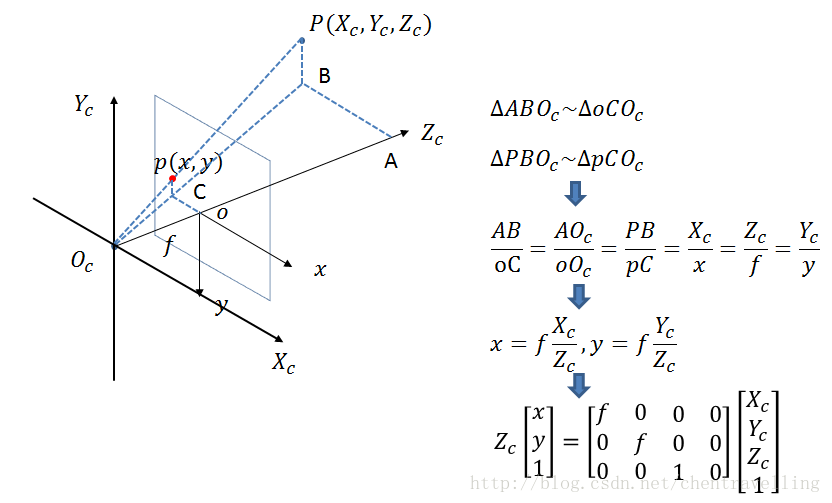

根据三角形相似性原理以及$f$的具体意义，可知图像坐标系可表示为   
$
x = f \frac{X_c}{Z_c} \\ y = f \frac{Y_c}{Z_c}
$
   
考虑简化的针孔模型  
$
\left[ \begin{matrix} x \\ y \\ 1 \end{matrix} \right] =
\frac{1}{z_c} \left[ \begin{matrix} f&0&0&0 \\ 0&f&0&0 \\ 0&0&1&0 \end{matrix} \right]
\left[ \begin{matrix} X_c \\ Y_c \\ Z_c \\ 1 \end{matrix} \right]
$

## 相机坐标系与世界坐标系的关系

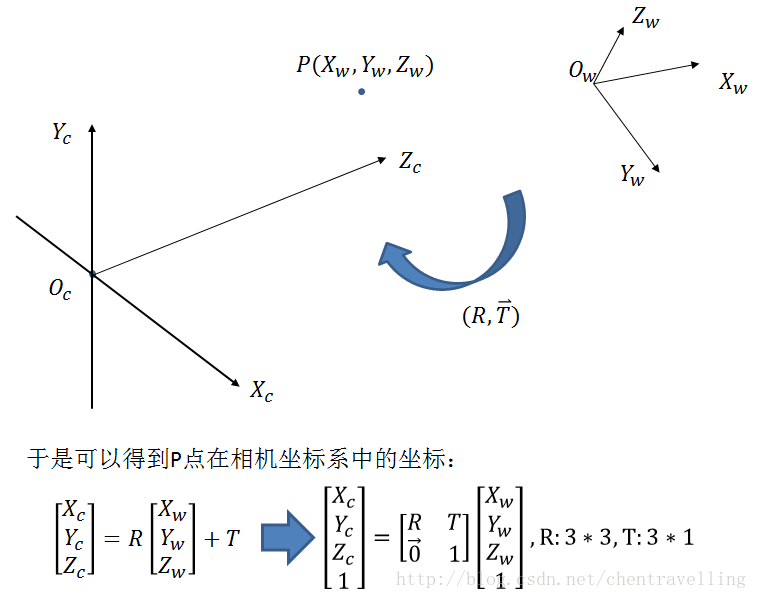

$
\left[ \begin{matrix} X_c \\ Y_c \\ Z_c \\ 1 \end{matrix} \right] = 
\left[ \begin{matrix} R&t \\ 0^T_3&1 \end{matrix} \right]
\left[ \begin{matrix} X_w \\ Y_w \\ Z_w \\ 1 \end{matrix} \right]
$

其中：$R$为旋转矩阵，是$x,y,z$三个轴向旋转矩阵的乘积，即$R=R_xR_yR_z$。$t$为平移量，表示三个轴向上的平移距离，即$T=[T_x,T_y,T_z]^T$。

## 三者之间的变换关系
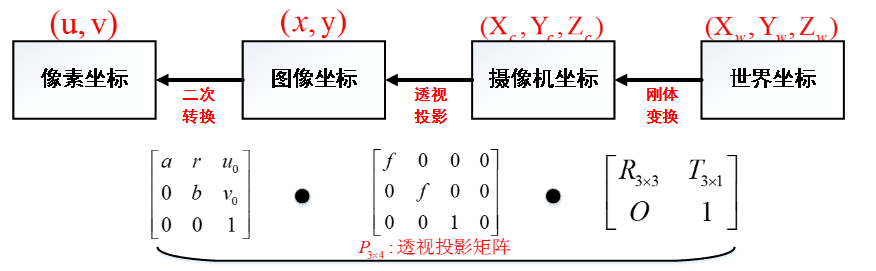

# 什么是相机的内、外参数矩阵？实际中你能结合身边的实例(如电脑摄像头、手机镜头)说明这些参数的大致值么？

相机的内外参数矩阵描述如下：
   
将第二问中的三个坐标系变换矩阵化简可得如下式子：
$
z_c \left[ \begin{matrix} u \\ v \\ 1 \end{matrix} \right] =
\left[ \begin{matrix} f_x&0&u_0&0 \\ 0&f_y&v_0&0 \\ 0&0&1&0 \end{matrix} \right]
\left[ \begin{matrix} R&t \\ 0^T&1 \end{matrix} \right]
\left[ \begin{matrix} X_w \\ Y_w \\ Z_w \\ 1 \end{matrix} \right]
$

令 
$
M_1 = \left[ \begin{matrix} f_x&0&u_0&0 \\ 0&f_y&v_0&0 \\ 0&0&1&0 \end{matrix} \right]
$，$M1$为相机内参矩阵


$
M_2 = \left[ \begin{matrix} R&t \\ 0^T&1 \end{matrix} \right]
$，$M2$为外参矩阵


$M=M_1M_2$，$M$为投影矩阵，则有
$
z_c\left[ \begin{matrix} u \\ v \\ 1 \end{matrix} \right] = M
\left[ \begin{matrix} X_w \\ Y_w \\ Z_w \\ 1 \end{matrix} \right]
$

    
相机的内参是与相机自身特性相关的参数，比如相机的焦距、像素大小等；  
相机的外参是在世界坐标系中的参数，比如相机的位置、旋转的方向等。

- 相机传感器以$mm$单位到像素之间有转换关系，举例，传感器的尺寸为$8mm*6mm$，转换到图像的像素大小是$640*480$，则 $dx=  640/8  =  80$，表示在像素坐标系中每个像素的物理大小就是$1/80$

# 说明使用线性法求解相对位姿时的要求输入和输出，以及求解的基本思想。

## 基于空间多点的相对位姿测量
   1. 采用线性法求解相对位姿时：
   
   需要的输入有：目标的六个或六个以上的非共面特征点在世界坐标系中的三维坐标，像素坐标系（二维像平面）中的二维坐标以及相机的内参数（内参数矩阵）。
   得到的输出为：目标坐标系相对相机坐标系的位置和姿态。
   2. 求解的基本思路:
   
   通过相机标定或者相机自身参数计算可以获得相机内参数和畸变系数，又已知的目标特征点三维坐标，以及其在像平面中的二维坐标。
   对于每一个特征点，均有：
   
$
Z_c \left[ \begin{array} u \\ v \\ 1 \end{matrix} \right] =
\left[ \begin{matrix} f_x&0&u_0&0 \\ 0&f_y&v_0&0 \\ 0&0&1&0 \end{matrix} \right]
\left[ \begin{matrix} R&t \\ 0^T&1 \end{matrix} \right]
\left[ \begin{matrix} X_w \\ Y_w \\ Z_w \\ 1 \end{matrix} \right] =
\left[ \begin{matrix} f_x&0&u_0 \\ 0&f_y&v_0 \\ 0&0&1\end{matrix} \right]
\left[ \begin{matrix} R&t \end{matrix} \right]
\left[ \begin{matrix} X_w \\ Y_w \\ Z_w \\ 1 \end{matrix} \right]
$

变换后：
$
Z_c \left[ \begin{matrix} f_x&0&u_0 \\ 0&f_y&v_0 \\ 0&0&1 \end{matrix} \right]^{-1}
\left[ \begin{matrix} u \\ v \\ 1 \end{matrix} \right] =
\left[ \begin{matrix} R&t\end{matrix} \right]
\left[\begin{matrix} X_w \\ Y_w \\ Z_w \\ 1 \end{matrix} \right]
$

变形后：
$
Z_c \left[ \begin{matrix} x' \\ y' \\ 1 \end{matrix} \right] =
\left[\begin{matrix} r_{11}&r_{12}&r_{13}&t_1 \\ r_{21}&r_{22}&r_{23}&t_2 \\ r_{31}&r_{32}&r_{33}&t_3 \end{matrix} \right]
\left[\begin{matrix} X_t \\ Y_t \\ Z_t \\ 1 \end{matrix} \right]
$

展开第一行：
$
Z_cx' = r_{11}X_t + r_{12}Y_t + r_{13}Z_t + t_1
$
   
类似展开第二、三行：
$
Z_cy' = r_{21}X_t + r_{22}Y_t + r_{23}Z_t + t_2 \\
Z_c = r_{31}X_t + r_{32}Y_t + r_{33}Z_t + t_3
$
   
第一行和第二行分别除以第三行，以消去$Z_c$:
   
得
$
x' = \frac{r_{11}X_t + r_{12}Y_t + r_{13}Z_t + t_1}{r_{31}X_t + r_{32}Y_t + r_{33}Z_t + t_3} \\
y' = \frac{Z_cy'=r_{21}X_t+r_{22}Y_t+r_{23}Z_t+t_2}{r_{31}X_t+r_{32}Y_t+r_{33}Z_t+t_3}
$
   
整理可得：
$
X_tr_{11} + Y_tr_{12} + Z_tr_{13} - x'X_tr_{31} - x'Y_tr_{32} - x'Z_tr_{33} + 1.t_1 + 0.t_2 = x't_3 \\
X_tr_{21} + Y_tr_{22} + Z_tr_{23} - y'X_tr_{31} - y'Y_tr_{32} - y'Z_tr_{33} + 0.t_1 + 1.t_2 = y't_3
$
   
整理为矩阵形式：
$
\left[ \begin{matrix} X_t&Y_t&Z_t&0&0&0&-x'X_t&-x'Y_t&-x'Z_t&1&0 \\ 0&0&0&X_t&Y_t&Z_t&-y'X_t&-y'Y_t&-y'Z_t&0&1 \end{matrix} \right]
\left[ \begin{matrix} 
\frac{r_{11}}{t_3} \\
\frac{r_{12}}{t_3} \\
\frac{r_{13}}{t_3} \\
\frac{r_{21}}{t_3} \\
\frac{r_{22}}{t_3} \\
\frac{r_{23}}{t_3} \\
\frac{r_{31}}{t_3} \\
\frac{r_{32}}{t_3} \\
\frac{r_{33}}{t_3} \\
\frac{t_1}{t_3} \\
\frac{t_2}{t_3} 
\end{matrix} \right] =
\left[ \begin{matrix} x' \\ y' \end{matrix} \right]
$

   由上式可知，一个特征点有两个方程，但未知参数有11个，则需要6个或6个以上的非共面的特征点。
   求得上面的11个参数以后，再根据旋转矩阵的性质，有此约束条件：$r^2_{11}+r^2_{21}+r^2_{31}=1$,可以求出$t_3$
   
   需要注意的是，我们现在求出来的参数，并不一定满足使旋转矩阵R为正交阵，于是需要再对$M = \left[ \begin{matrix} R&t' \end{matrix} \right] = R\left[ \begin{matrix} I&R^{-1}t \end{matrix} \right]$

   对M利用QR分解，得出的Q即是旋转矩阵。
   
   最后根据旋转矩阵计算旋转角，以Rodrigues向量形式表示

## 基于平面多特征点的相对位姿测量
   1. 采用线性法求解相对位姿时：
   
   需要的输入有：目标的四个或四个以上的非共线特征点在世界坐标系中的二维坐标，像素坐标系（二维像平面）中的二维坐标以及相机的内参数（内参数矩阵）。
   得到的输出为：目标坐标系相对相机坐标系的位置和姿态。
   2. 求解的基本思路:
   
   通过相机标定或者相机自身参数计算可以获得相机内参数和畸变系数，又已知的目标特征点二维坐标，以及其在像平面中的二维坐标。
   设$Z_t=0$（特征共面），则对于每一个特征点，均有：
   
$
Z_c \left [\begin{matrix} x' \\ y' \\ 1 \end{matrix} \right] =
\left[ \begin{matrix} r_{11}&r_{12}&r_{13}&t_1 \\ r_{21}&r_{22}&r_{23}&t_2 \\ r_{31}&r_{32}&r_{33}&t_3 \end{matrix} \right]
\left[ \begin{matrix} X_t \\ Y_t \\ 0 \\ 1 \end{matrix} \right] =
\left[ \begin{matrix} r_{11}&r_{12}&t_1 \\ r_{21}&r_{22}&t_2 \\ r_{31}&r_{32}&t_3 \end{matrix} \right]
\left[ \begin{matrix} X_t \\ Y_t \\ 1 \end{matrix} \right]
$

得到两个方程  
$
x' = \frac{r_{11}X_t + r_{12}Y_t + r_{13}Z_t + t_1}{r_{31}X_t + r_{32}Y_t + r_{33}Z_t + t_3} \\
y' = \frac{r_{21}X_t + r_{22}Y_t + r_{23}Z_t + t_1}{r_{31}X_t + r_{32}Y_t + r_{33}Z_t + t_3}
$
   
   
   
$
\left[ \begin{matrix} X_t&Y_t&0&0&-x'X_t&-x'Y_t&1&0 \\ 0&0&X_t&Y_t&-y'X_t&-y'Y_t&0&1 \end{matrix} \right]
\left[ \begin{matrix} 
\frac{r_{11}}{t_3}	\\
\frac{r_{12}}{t_3}	\\
\frac{r_{21}}{t_3}	\\
\frac{r_{22}}{t_3}	\\
\frac{r_{31}}{t_3}	\\
\frac{r_{32}}{t_3}	\\
\frac{t_1}{t_3}		\\
\frac{t_2}{t_3}
\end{matrix} \right] =
\left[ \begin{matrix} x' \\ y' \end{matrix} \right]
$

   再根据约束条件（旋转矩阵在每一列具有单位长度的性质）：$r^2_{11}+r^2_{21}+r^2_{31}=1$,可以求出$t_3$
   
   再利用约束条件（旋转矩阵任意两列都是正交的）:$r_3=r_1×r_2$,可以求出旋转矩阵的第三列$r_3$。

# 说明使用Zhang方法进行相机标定需要的输入条件和得到的具体输出量，以及Zhang方法的主要步骤

## 输入条件
目标物体的多个pose的图片数据，一般20-30张。

特征角点在目标平面的坐标，以及在相机像素平面上的坐标。

## 输出量
相机的内参数矩阵、畸变系数，外参数矩阵

## Zhang方法的主要步骤
   1. 设定标定板
       - 旋转标定板或相机，采集标定板图像的不同pose，对一个pose，计算单应矩阵(类似 M 矩阵)
   2. 有三个以上pose，根据各单应矩阵计算线性相机参数， 使用非线性优化方法计算非线性参数；
   3. 最后得到相机内参数、矩阵畸变系数以及每张图片的旋转变量和平移变量